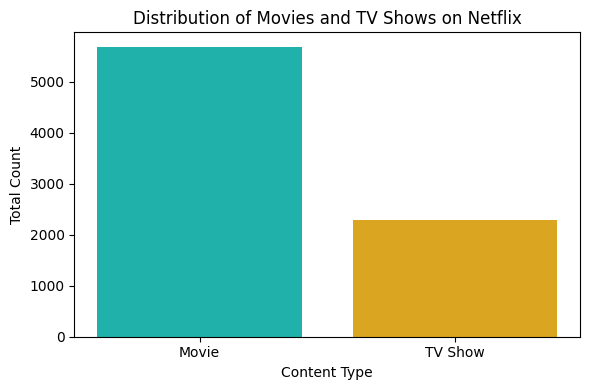

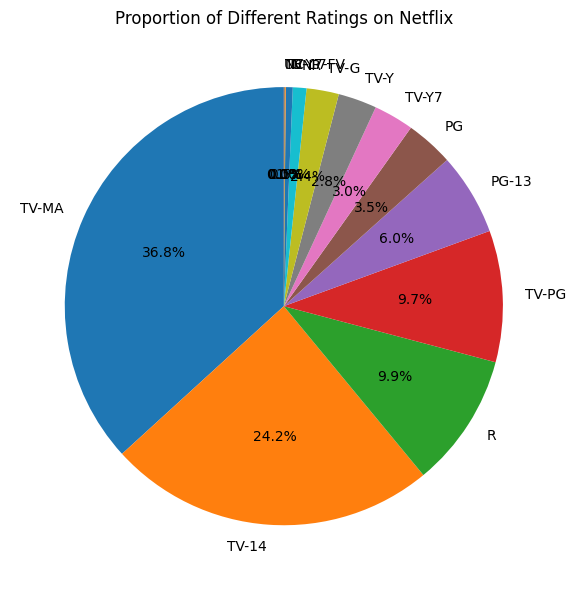

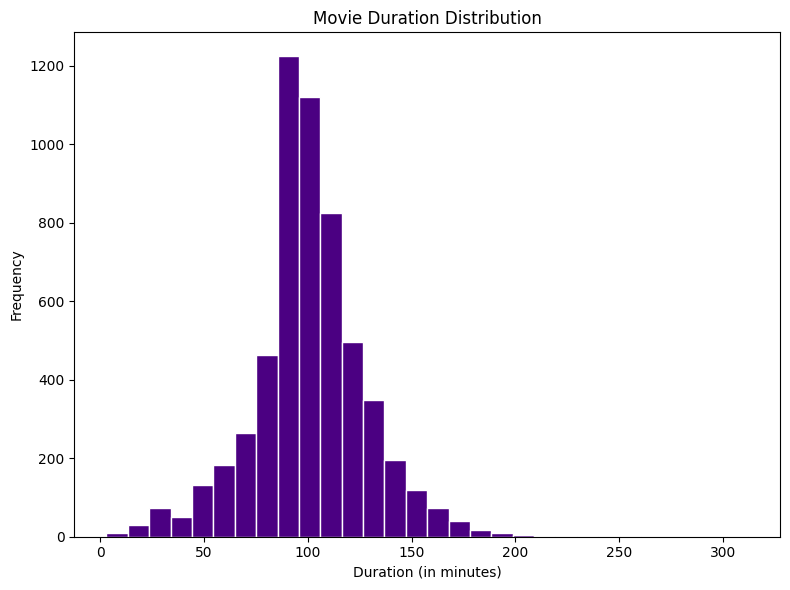

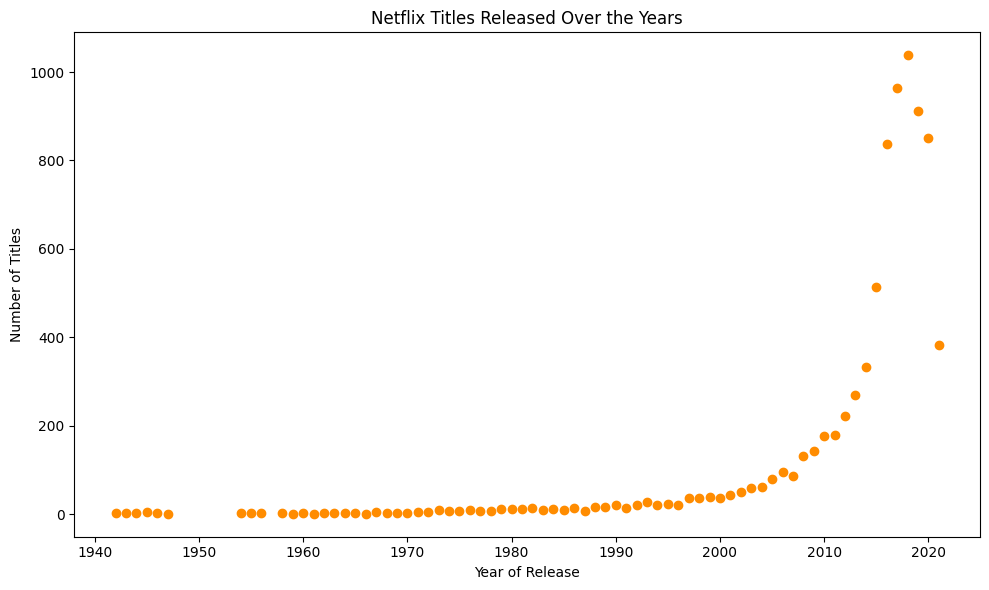

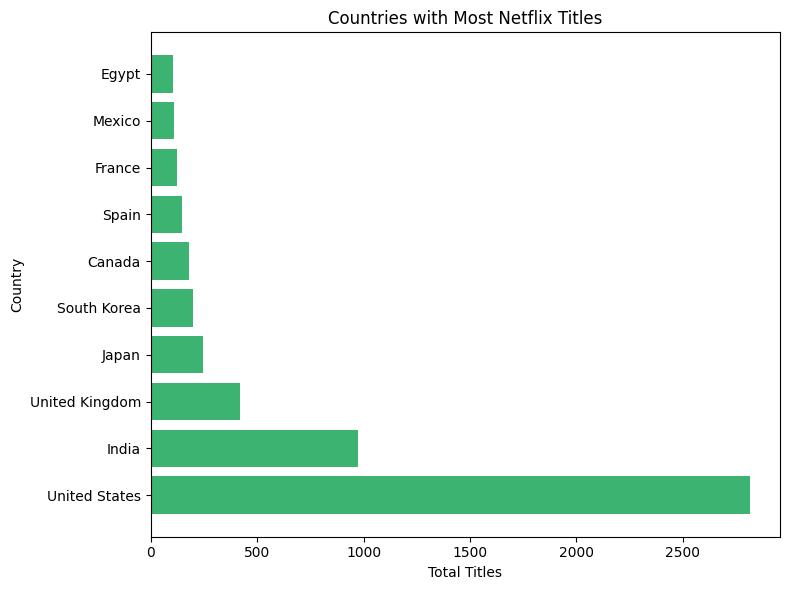

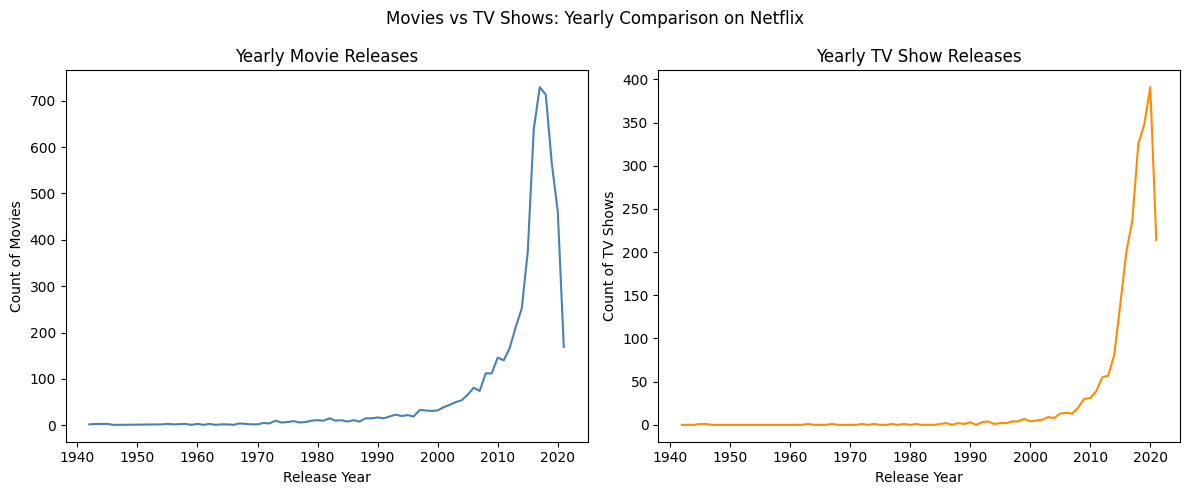

In [2]:
# Netflix Dataset Analysis & Visualization

# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
netflix_data = pd.read_csv('netflix_dataset.csv')

# Step 3: Data cleaning — drop rows missing essential fields
columns_to_clean = ['type', 'release_year', 'rating', 'country', 'duration']
netflix_data.dropna(subset=columns_to_clean, inplace=True)

# Step 4: Content Type Distribution (Movies vs TV Shows)

content_type_counts = netflix_data['type'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(content_type_counts.index, content_type_counts.values, color=['lightseagreen', 'goldenrod'])
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Total Count')
plt.tight_layout()
plt.savefig('netflix_content_types_bar.png')
plt.show()

# Step 5: Rating Distribution Pie Chart

rating_summary = netflix_data['rating'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(rating_summary,
        labels=rating_summary.index,
        autopct=lambda pct: f'{pct:.1f}%',
        startangle=90)
plt.title('Proportion of Different Ratings on Netflix')
plt.tight_layout()
plt.savefig('netflix_rating_chart.png')
plt.show()

# Step 6: Movie Duration Histogram

only_movies = netflix_data[netflix_data['type'] == 'Movie'].copy()
only_movies['duration_minutes'] = only_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(8, 6))
plt.hist(only_movies['duration_minutes'], bins=30, color='indigo', edgecolor='white')
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('movie_duration_histogram_custom.png')
plt.show()

# Step 7: Titles Released Per Year (Scatter Plot)

titles_per_year = netflix_data['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.scatter(titles_per_year.index, titles_per_year.values, color='darkorange')
plt.title('Netflix Titles Released Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig('netflix_releases_by_year.png')
plt.show()

# Step 8: Top 10 Countries by Number of Titles

top_countries = netflix_data['country'].value_counts().head(10)

plt.figure(figsize=(8, 6))
plt.barh(top_countries.index, top_countries.values, color='mediumseagreen')
plt.title('Countries with Most Netflix Titles')
plt.xlabel('Total Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('netflix_top_countries.png')
plt.show()

# Step 9: Movies vs TV Shows Released Over Time (Subplots)

yearly_content_split = netflix_data.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left plot: Movies
axes[0].plot(yearly_content_split.index, yearly_content_split['Movie'], color='steelblue')
axes[0].set_title('Yearly Movie Releases')
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Count of Movies')

# Right plot: TV Shows
axes[1].plot(yearly_content_split.index, yearly_content_split['TV Show'], color='darkorange')
axes[1].set_title('Yearly TV Show Releases')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('Count of TV Shows')

fig.suptitle('Movies vs TV Shows: Yearly Comparison on Netflix')
plt.tight_layout()
plt.savefig('netflix_movies_vs_tvshows_trend.png')
plt.show()
